# Image Transformations

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
def plot_mult_images(imlist, titles = [], rc = '22', show_axis_labels = True):
    """
    Plot many images organized in subplots.
    """
    for i in range(len(imlist)):
        img = imlist[i]
        plt.subplot(rc + str(i+1))
        
        if img.ndim > 2:
            plt.imshow(img)
        else:
            plt.imshow(img, cmap='gray')

        if show_axis_labels:
            plt.xlabel('x')
            plt.ylabel('y')
        
        if titles != []:
            plt.title(titles[i])

In [4]:
imfile = '../db/lena.png'
img = cv2.imread(imfile)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Translation

In [5]:
height, width = img.shape[:2]
print("Height = " + str(height))
print("Width = " + str(width))

Height = 512
Width = 512


T = 
[

1 0 Tx

0 1 Ty

]

T is our transformation matrix

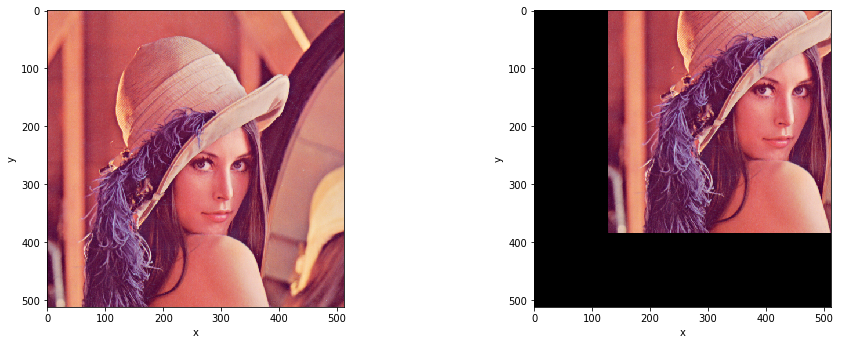

In [6]:
# We use warpaffine to transform the image using a transformation matrix
T = np.float32([[1, 0, width/4], [0, 1, -height/4]])
img_translation = cv2.warpAffine(img, T, (width, height))
plot_mult_images([img, img_translation])

## Rotation

Affine rotation

M = | cos theta   -sin theta |

    | sin theta    cos theta |

Where:

theta -- the angle of rotation

#cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle_of_rotation, scale)

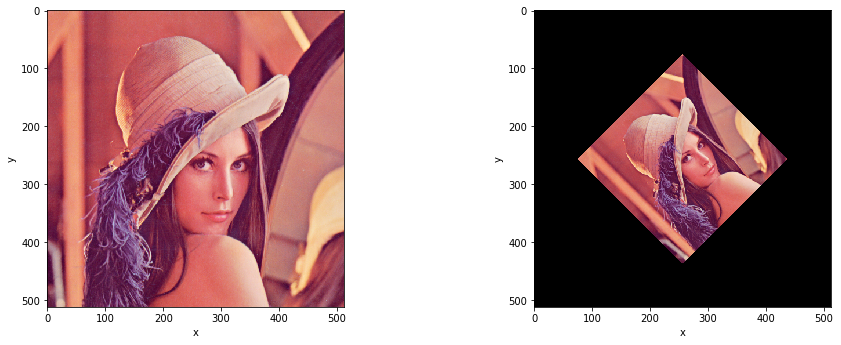

In [7]:
#%% divided by 2 to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 45, .5)
img_rotated = cv2.warpAffine(img, rotation_matrix, (width, height))
plot_mult_images([img, img_rotated])

# Image Pyramids

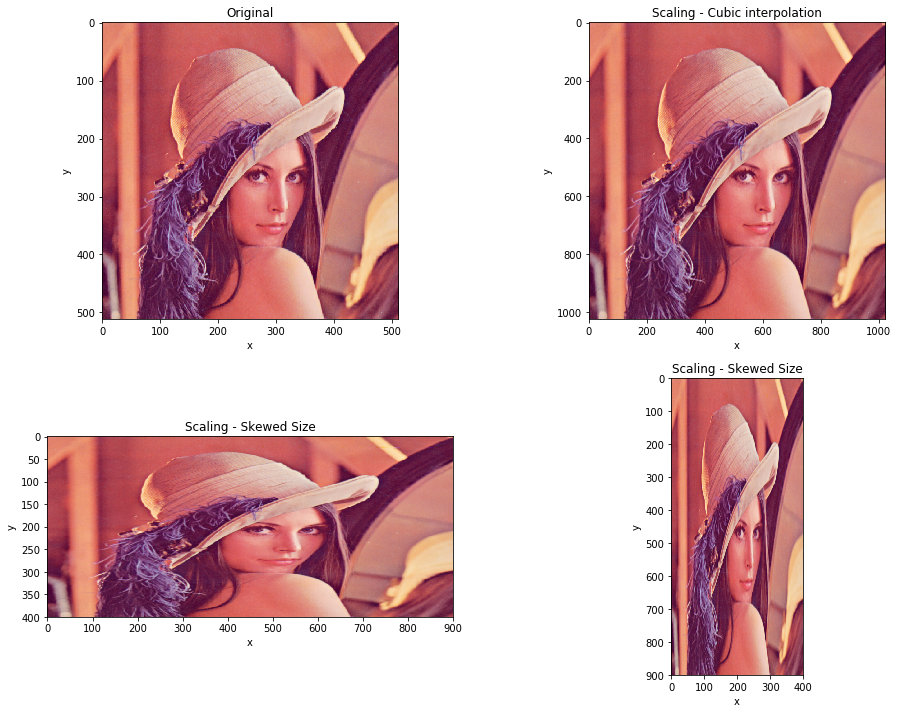

In [8]:
image_scaled = cv2.resize(img, None, fx = 0.75, fy = 0.75)  ## fx and fy are the factors
titles = ['Original']

## make the image double it's size
img_scaled1 = cv2.resize(img, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)
titles.append('Scaling - Cubic interpolation')

## skew the re-sizing by setting exact dimensions
img_scaled2 = cv2.resize(img, (900, 400), interpolation = cv2.INTER_AREA)
titles.append('Scaling - Skewed Size')

img_scaled3 = cv2.resize(img, (400, 900), interpolation = cv2.INTER_AREA)
titles.append('Scaling - Skewed Size')
titles.append('Scaling - Skewed Size')

plot_mult_images([img, img_scaled1, img_scaled2, img_scaled3], titles)

## Bitwise operations

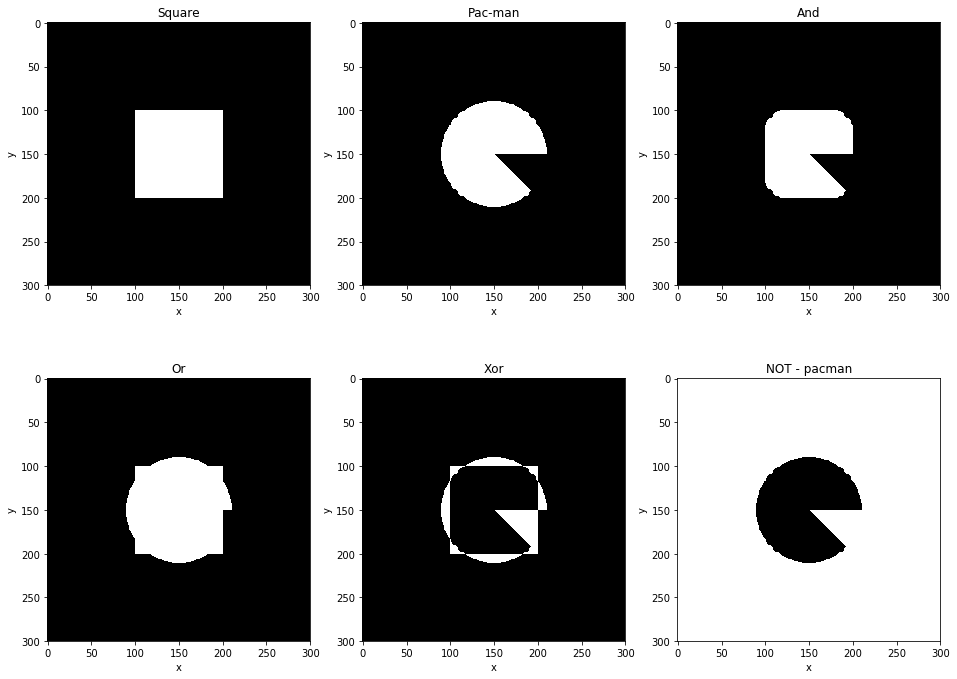

In [9]:
imgs = []
titles = []

#making a square
square = np.zeros((300,300), np.uint8)
top_left_corner = (100,100)
bot_right_corner = (200,200)
cv2.rectangle(square, top_left_corner, bot_right_corner, 255, -2)
imgs.append(square)
titles.append('Square')

#making ellipse
pacman = np.zeros((300,300), np.uint8)
cv2.ellipse(pacman, (150,150), (60,60), 0, 45, 360, 255, -1)
imgs.append(pacman)
titles.append('Pac-man')

#show only where they intersectd 
And = cv2.bitwise_and(square, pacman)
imgs.append(And)
titles.append('And')

bitwiseOr = cv2.bitwise_or(square, pacman)
imgs.append(bitwiseOr)
titles.append('Or')

bitwiseXor = cv2.bitwise_xor(square, pacman)
imgs.append(bitwiseXor)
titles.append('Xor')

bitwiseNot_sq = cv2.bitwise_not(pacman)
imgs.append(bitwiseNot_sq)
titles.append('NOT - pacman')

plot_mult_images(imgs, titles, rc = '23')

## Cropping

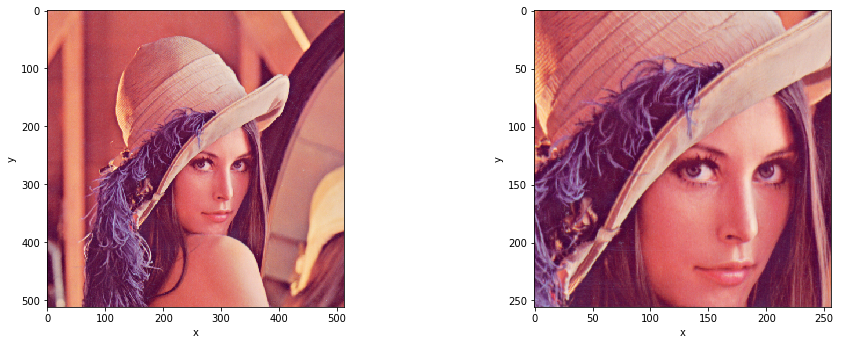

In [10]:
height, width = img.shape[:2]
# lets get starting pixel coordinates (top left of cropping rectangle)
start_row, start_col = int(height * .25), int(width * .25)
# lets get the ending pixel coordinates (bottom right)
end_row, end_col = int(height * .75), int(height * .75)
# simply use indexing to crop out the rectangle we desire 
cropped = img[start_row:end_row, start_col:end_col]
plot_mult_images([img, cropped])